<img src=https://i.imgur.com/2qapvM3.png>

# Game Of Nodes

Mini project Data Science

<img src=http://i64.tinypic.com/2sbwvnt.jpg/>  

<img src=http://i66.tinypic.com/2eulidt.jpg/>

<img src=https://i.imgur.com/1rbp2LC.jpg/>

<img src = "http://s10.postimg.org/raqmeh2nt/Foto_op_29_10_15_om_16_06.jpg">

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Rens Gingnagel|11032200|rensgingnagel@gmail.com|
|Joeri Primowees|10976329|joerip_@hotmail.com|
|Rob Dekker|11020067|rob.dekker@student.uva.nl|
|Tom Dekker|11031735|tom_dekker@live.nl|
|Jimi Duiveman|11023163|jimiduiveman@hotmail.com|

## Abstract

Game of Thrones is een boekenserie die verfilmt is en is uitgegroeid tot een van de populairste televisieshows ter wereld. Het verhaal speelt zich af in een fictieve wereld met een enorm scala aan personages. Door middel van text mining is er gekeken in hoeverre het mogelijk is op deze manier de onderlinge relaties van de personages bloot te leggen aan de hand van meerdere deelvragen. Uit dit onderzoek is gebleken dat het in grote mate mogelijk is de onderlinge relaties van de personage te analyseren. De gebruikte data was een voorgeprepareerde dataset, het is niet mogelijk gebleken deze na te bootsen op zo een korte termijn.

## Introduction

Game of Thrones is een populaire televisieshow waarvan op dit moment maar liefst 7 seizoenen zijn uitgebracht. Het is gebaseerd op een verhaal uit de roman series genaamd ‘A song of Fire and Ice’, geschreven door George R. R. Martin, waarvan de eerste roman de titel ‘A Game of Thrones’ is. Hierop is de naam van de televisieshow gebaseerd. Het verhaal speelt zich af in een fictieve wereld met continenten genaamd Westeros en Essos. Het verhaal bestaat uit drie grote verhaallijnen waarin de karakters in het boek onderling kruisen en dit resulteert in een interessante dataset voor een netwerkanalyse met gebruik van verschillende Python libraries. Vanwege de vele personages in het verhaal is het dan ook interessant om door middel van text mining tot de kern van het verhaal door te dringen. De onderzoeksvraag van het project luidt; “In welke mate is het mogelijk de relatie tussen de personages in de Game of Thrones boeken te analyseren met het gebruik van text mining?”. Deze hoofdvraag zal worden opgesplitst in verschillende deelvragen om tot een duidelijk antwoord te komen, deze deelvragen luiden als volgt: 
* Welk personage speelt de belangrijkste rol in de boeken?
* Welke relatie tussen twee personages is het sterkst?
* Welke relaties tussen de personages houden stand gedurende de eerste vijf boeken?
* In hoeverre is het mogelijk de dataset van DataCamp zelf te reproduceren?

## Related Work

Het minen van een tekst houdt het proces in om uit ongestructureerde data nuttige informatie te halen ([Zende et al, 2016](http://troindia.in/journal/ijcesr/vol3iss3/54-56.pdf)). Zo is het mogelijk een boek, met ongestructureerde tekst, samen te vatten in dataframes en grafieken om een kort maar krachtig beeld te geven van de structuur van het verhaal ([Ardanuy & Sporleder, 2014](http://www.aclweb.org/anthology/W14-0905)). De tekst uit een boek in EPUB formaat kan verkregen worden door middel van TEXTRACT, een krachtige tekst extractie tool ([Cooper, Coden & Brown, 2002](http://delivery.acm.org/10.1145/590000/584835/p245-cooper.pdf?ip=146.50.214.39&id=584835&acc=ACTIVE%20SERVICE&key=0C390721DC3021FF%2E86041C471C98F6DA%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&__acm__=1522241108_cc298bd0191c554c01b97bf9bce8ca84)). Door deze informatie te combineren met een tweede databron kan nieuwe unieke data gegenereerd worden. Een goede manier om deze tweede databron, Wikipedia, te scrapen is de tool BeautifulSoup ([Zende et al, 2016](http://troindia.in/journal/ijcesr/vol3iss3/54-56.pdf)). Deze data is te gebruiken om bijvoorbeeld alle namen die overeenkomen met het tekstbestand van het boek te vergelijken en zo de relatie tussen de personages eruit te halen. Om hier relevante informatie uit te krijgen is het handig om deze data te structureren in bijvoorbeeld een CSV-bestand. Uit een CSV-bestand is het mogelijk een dataframe te maken met pandas ([McKinney, 2011](http://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf)). Als het dataframe eenmaal is gemaakt, is het mogelijk een netwerkanalyse te doen over de informatie uit het dataframe. Om de berekeningen te doen om deze analyse uit te voeren is NetworkX een krachtige tool, hiermee kan je kijken naar de verhoudingen en structuren tussen de nodes in het netwerk ([Hagberg, Swart & Chult, 2008](http://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-UR-08-05495)).  


## Methodology

De verkregen data is afkomstig uit een dataset die geanalyseerd is door Andrew J. Beveridge en Jie Shan. Deze dataset is online beschikbaar gesteld via GitHub. De reden dat wij bij deze data zijn gekomen is door een netwerkanalyse project dat gepubliceerd is op de website van Datacamp. In deze dataset staan verschillende CSV-bestanden, voor ieder boek is er een apart CSV-bestand waarin de interacties tussen de verschillende personages staan. Ook is er een bestand waarin al deze gegevens bij elkaar zijn toegevoegd. De CSV-bestanden bestaan uit de kolommen *Source*, *Target*, *Type*, *Weight*, *Id* en *Book*. Iedere regel staat voor een connectie tussen een personage (*Source*) en een ander personage (*Target*). Er is een connectie tussen twee personages wanneer de (bij)namen van de personages binnen 15 woorden van elkaar voorkomen in een van de boeken. Het gewicht (*Weight*) van deze connectie staat voor het aantal keer dat deze connectie voorkomt. Een connectie kan echter van alles zijn; twee personages kunnen zich op dezelfde locatie bevinden, twee personages kunnen een conversatie hebben, een personage kan over een ander personage praten, of misschien praat een derde personage over twee andere personages. Door deze onwetendheid zijn alle connecties in het netwerk ongericht (*Type*), deze kolom is dus irrelevant. Ook wordt de kolom *Id* gedropt, omdat deze simpelweg de index representeert.

Met deze connecties en de personages die betrokken zijn bij deze connecties kan een netwerk worden gecreëerd per boek. De personages vormen de nodes en de connectie wordt weergegeven als een edge tussen twee nodes.

In [22]:
import pandas as pd
# pip install Wordcloud (if you haven't already done)
from wordcloud import WordCloud
import networkx as nx
import matplotlib.pyplot as plt

# Creating a list of networks for all the books
books = []
book_fnames = ['datasets/book1.csv', 'datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

Vervolgens is het mogelijk om te berekenen welk personage het meest belangrijk is met behulp van drie centraliteit metingen. De eerste meting, genaamd *degree centrality*, meet het aantal buren ofwel verbindingen van de node. Vervolgens wordt de *betweenness centrality* gemeten. Dit meet het aantal keer dat een node op het kortste pad van twee andere nodes ligt. Deze meting geeft aan in hoeverre een node dient als een zogenaamde brug. Ten slotte wordt *PageRank* toegepast, een meting die rekening houdt met de directe connecties en indirecte connecties van een node ([Wu et al, 2008](https://link.springer.com/article/10.1007/s10115-007-0114-2)). Op deze manier wordt de invloed van een node met betrekking tot het netwerk aangeduid. Deze scores worden opgeteld en geven dus de som van deze drie metingen per node.

In [23]:
ranking1 = [nx.degree_centrality(book) for book in books]
degree_rank_df = pd.DataFrame.from_records(ranking1).fillna(0)

ranking2 = [nx.betweenness_centrality(book, weight='weight') for book in books]
betweenness_rank_df = pd.DataFrame.from_records(ranking2).fillna(0)

ranking3 = [nx.pagerank(book) for book in books]
pagerank_rank_df = pd.DataFrame.from_records(ranking3).fillna(0)

# Finding the most important character over all books
total = betweenness_rank_df.sum(axis=0) + degree_rank_df.sum(axis=0) + pagerank_rank_df.sum(axis=0)
dict_personages = total.sort_values(ascending=False).to_dict()

Om te kijken welke relatie tussen twee personages het sterkst is, kunnen we simpelweg zoeken naar de rij in het dataframe (van alle connecties) waarbij de waarde in de kolom *Weight* gelijk is aan de maximale waarde in die kolom.

In [24]:
all_edges = pd.read_csv("datasets/all_edges/all-edges.csv")
strongest_connection = all_edges[all_edges['weight'] == all_edges['weight'].max()]

Door middel van een loop door de vijf verschillende CSV-bestanden kunnen we voor ieder boek een aparte kolom toevoegen aan het dataframe. In deze kolom staan de weights van de connecties in het desbetreffende boek. Wanneer een connectie niet in het boek voorkomt, krijgt deze een NaN waarde. Op deze manier kunnen we achterhalen hoe de connecties over de verschillende boeken verspreid zijn.

In [25]:
import os
for book in os.listdir('datasets'):
    if '.csv' in book:
        for row in pd.DataFrame.from_csv('datasets/'+book).reset_index().itertuples():
            for row2 in all_edges.itertuples():                
                if row[1:3] == row2[1:3]:
                    all_edges.set_value(row2[0], book.split('.')[0], row[4])   
    
# ALL edges are "Undirected" and indexes are already given, due to reset_index()
all_edges = all_edges.drop(['Type', 'id'], axis=1)

Om antwoord te geven op de derde deelvraag kijken we naar het aantal NaN waarden per rij. Wanneer een connectie tussen twee personages gedurende de vijf boeken stand houdt, bevat de rij geen NaN waarden. Dit doen we door middel van een boolean test.

In [26]:
harde_kern = all_edges[all_edges.isnull().any(axis=1) == False]

Bij de laatste deelvraag, “In hoeverre is het mogelijk de dataset van DataCamp zelf te reproduceren?”, proberen we in feite de dataset zoals die is aangeleverd door Datacamp zelf te maken. Om dit te kunnen doen combineren we twee belangrijke databronnen; de tekst van de boeken en de personages. Vervolgens kunnen we zelf berekeningen uitvoeren om op de gewenste dataset uit te komen. 

Bij de boeken zijn we alleen geïnteresseerd in de tekst per boek. Hiervoor hebben we de boeken uit de serie in digitaal EPUB formaat aangeschaft. Een EPUB bestand is onder de motorkap eigenlijk een gezipte verzameling XML-bestanden. Uiteindelijk willen we alle tekst uit deze XML-bestanden halen. Het is natuurlijk erg onhandig om al deze bestanden handmatig in te lezen. Gelukkig bestaat er een mooie Python library genaamd textract die dit voor je doet. Vervolgens moeten we aangeven dat deze tekst een UTF-8 encoding heeft.

In [ ]:
# pip install textract (if you haven't already done)
import textract
text = textract.process("datasets/aGameOfThrones.epub")
decoded = text.decode("utf-8")

De tweede belangrijke dataset is een lijst met names van de personages. Deze lijst hebben we nodig zodat we de termen hebben om de tekst van het boek te doorzoeken. De namen van alle personages staan op de wiki van Game of Thrones. Met behulp van BeautifulSoup scrape magie hebben we alle namen van de wiki in een Python lijst geplaatst.
Vervolgens kunnen we per personage in de lijst de tekst van de boeken doorzoeken om te zien hoe vaak ze voorkomen. 

In [ ]:
from bs4 import BeautifulSoup
import requests

page = requests.get("http://awoiaf.westeros.org/index.php/List_of_characters#A")
soup = BeautifulSoup(page.content, 'html.parser')
listItems = soup.select('li')
characterNames = [x.find("a").get_text() for x in listItems]
uniqueNames = set(characterNames)
uniqueNames.remove("")

De hoofdvraag zal beantwoord worden door te kijken of de antwoorden op de deelvragen representatief zijn voor wat er in de boeken geschreven staat. Deze antwoorden zijn, omdat een verhaal op meerdere manieren te interpreteren is, niet voor iedereen hetzelfde. De antwoorden uit de deelvragen zullen dus ook vergeleken moeten worden met wat de meeste kenners van de serie zouden vinden. Op deze manier is te controleren in hoeverre het mogelijk is met text mining tot de kern van een verhaal te komen.  

## Evaluatie

Uit de methode zal de hoofdvraag worden beantwoord aan de hand van de antwoorden van de deelvragen. Deze luiden als volgt:

**Welk personage speelt de belangrijkste rol in de boeken?**

*Tyrion Lannister* is in de boeken het belangrijkste personage. Dit is getest aan de hand van de betweenness centrality, degree centrality en PageRank. De opgetelde waarden hiervan leiden tot de conclusie dat hij het belangrijkste personage is in de boekenreeks.

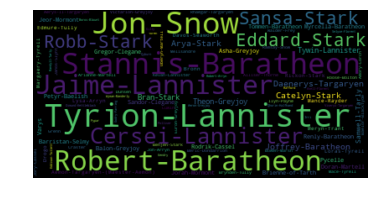

In [28]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict_personages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Welke relatie tussen twee personages is het sterkst?** 

De connectie tussen *Eddard Stark en Robert Baratheon* komt het meest voor. Dit is gebaseerd op de weight van de edge tussen twee nodes in het netwerk. In boek 1 is deze weight het grootst voor bovenstaande connectie, verder daalt de weight in de daaropvolgende boeken. Hierover kan op verschillende manieren gespeculeerd worden. Zo zou een van de twee personages uit het boek zijn geschreven of kan de relatie dusdanig verwaterd zijn dat de personages niet meer samen genoemd worden in het boek.

**Welke relaties tussen de personages houden stand gedurende de eerste vijf boeken?**

Er zijn in totaal 31 connecties die in alle eerste vijf boeken voorkomen. In het dataframe kun je de verdeling van de weights zien over de boeken.

In [29]:
harde_kern.head()

,Source,Target,weight,book1,book2,book3,book4,book5
58,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,110,34.0,11.0,36.0,17.0,12.0
64,Aemon-Targaryen-(Maester-Aemon),Samwell-Tarly,99,5.0,5.0,32.0,41.0,16.0
101,Aerys-II-Targaryen,Robert-Baratheon,35,12.0,6.0,9.0,3.0,5.0
354,Arya-Stark,Sansa-Stark,155,104.0,20.0,23.0,4.0,4.0
606,Boros-Blount,Meryn-Trant,31,5.0,13.0,6.0,4.0,3.0


Het is ook interessant om te kijken naar het percentage van alle connecties die tot deze harde kern behoren. Dit geeft aan dat eigenlijk maar een heel kleine hoeveelheid connecties door alle boeken stand houden.

In [30]:
print(round(len(harde_kern)/len(all_edges)*100,2), '%')

1.1 %


**In hoeverre is het mogelijk de dataset van DataCamp zelf te reproduceren?**

Bij het bekijken van de zelfgemaakte dataset kwamen we al snel een groot probleem tegen; personages in het boek worden zelden bij hun volledige voor- en achternaam genoemd zoals deze op de wiki staat. Brandon Stark wordt bijvoorbeeld heel vaak Bran of Brandon of The Young Stark genoemd. De enige manier om dit op te lossen zou zijn om per karakter al deze bijnamen op te zoeken. Dit is technisch mogelijk maar te veel werk voor dit mini project. Na extra research bleek dat de makers van de Datacamp dataset veel characters handmatig hebben ingevoerd. 

## Conclusie

Het is zeer goed mogelijk de onderlinge verhoudingen van de personages in Game of Thrones  te analyseren door middel van text mining. Zo is het mogelijk te bekijken welk personage de grootste rol speelt, welke personages de sterkste band hebben en welke personages de langste band hebben gedurende de boekenreeks. Het is echter niet mogelijk op korte termijn de dataset van Data Camp na te bootsen vanwege de korte tijd en hoeveelheid handmatig werk dat hier in gestoken zou moeten worden. Om deze reden is de dataset van Data Camp gedurende het project in gebruik gebleven.

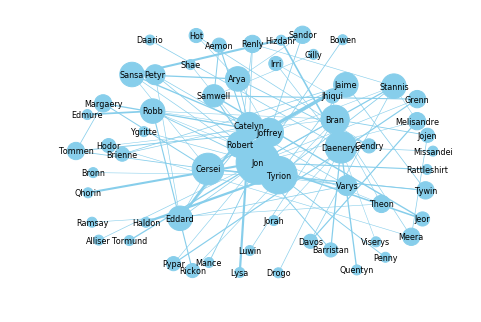

In [31]:
all_edges = pd.read_csv("datasets/all_edges/all-edges.csv")
all_edges_adjusted = all_edges[all_edges['weight'] > 50]

G = nx.from_pandas_dataframe(all_edges_adjusted, 'Source', 'Target', create_using=nx.Graph() )

mapping = dict(zip(G.nodes(),[x.split('-')[0] for x in G.nodes()]))
G_firstname = nx.relabel_nodes(G,mapping)
d = nx.degree(G_firstname)
pos = nx.spring_layout(G_firstname,k=0.65,iterations=15)
nx.draw(G_firstname, pos, with_labels=True, node_color='skyblue', nodelist=[v[0] for v in d], node_size=[v[1] * 100 for v in d], font_size=8, edge_color='skyblue', width=[x*0.01 for x in all_edges_adjusted['weight']], edge_cmap=plt.cm.Blues)
plt.show()

## Appendix

**Referenties**

Ardanuy, M. C., & Sporleder, C. (2014). Structure-based clustering of novels. In Proceedings of the 3rd Workshop on Computational Linguistics for Literature (CLFL) (pp. 31-39).

Cooper, J. W., Coden, A. R., & Brown, E. W. (2002, November). Detecting similar documents using salient terms. In Proceedings of the eleventh international conference on Information and knowledge management (pp. 245-251). ACM.

Hagberg, A., Swart, P., & S Chult, D. (2008). Exploring network structure, dynamics, and function using NetworkX (No. LA-UR-08-05495; LA-UR-08-5495). Los Alamos National Lab.(LANL), Los Alamos, NM (United States).

McKinney, W. (2011). pandas: a foundational Python library for data analysis and statistics. Python for High Performance and Scientific Computing, 1-9.

Wu, X., Kumar, V., Quinlan, J. R., Ghosh, J., Yang, Q., Motoda, H., ... & Zhou, Z. H. (2008). Top 10 algorithms in data mining. Knowledge and information systems, 14(1), 1-37.

Zende, M. A., Tuplondhe, M. B., Walunj, S. B., & Parulekar, S. V. (2016) TEXT MINING USING PYTHON.


**Code die de top 10 personages met de meeste connecties laat zien. Deze personages hebben met veel verschillende personages een connectie en/of de weight van de connecties is erg hoog. De weights worden per personage opgeteld. Het maakt niet uit of een personage in de kolom *Source* of *Target* voorkomt, omdat het een ongericht netwerk is. Deze waarden worden vervolgens ook bij elkaar samengevoegd.**

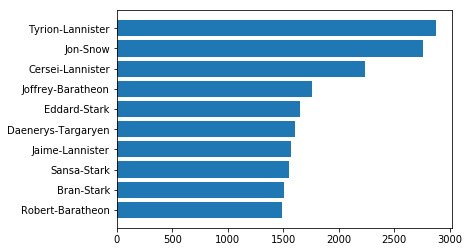

In [38]:
source = all_edges.groupby(['Source'])['weight'].sum()
target = all_edges.groupby(['Target'])['weight'].sum()
most_relations = target.add(source, fill_value = 0).sort_values(ascending=False)[:10]
plt.barh(range(len(most_relations.index), 0, -1), most_relations)
plt.yticks(range(len(most_relations.index), 0, -1), most_relations.index)
plt.show()

In [ ]:
#convert to slideshow in the command-line with this code
jupyter nbconvert MiniProjectVerslag.ipynb --to slides --post serve